In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import multiprocessing as mp

In [2]:
pool = mp.Pool(4)

In [4]:
def fun(a):
    a**2

In [ ]:
pool.map(fun, [1,2,3,4])

In [2]:
#Getting the dataset
dataset = pd.read_csv('aapl_msi_sbux.csv')

In [22]:
#Importing the reduce function
from functools import reduce

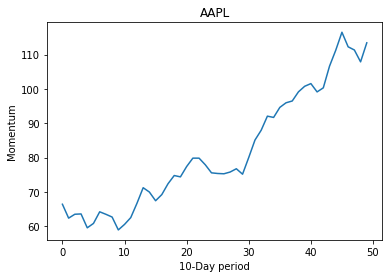

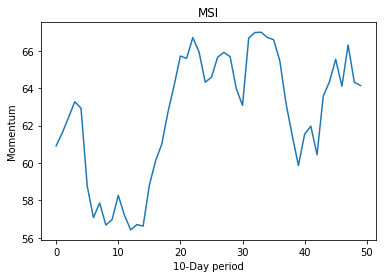

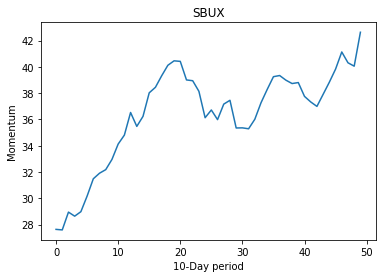

In [28]:
momentum = []
name = ["AAPL" , "MSI" , "SBUX"]
for i in range(3):
    #Getting the dataset
    current = dataset.iloc[:500,i].values
    current = current.reshape((-1,10))
    
    current = list(
        map(lambda x: 
            reduce(lambda a,b : a*0.9 + (1-0.9)*b , x),#Making the reduce function
            current))                                  #Maping the reduction function
    #Appending the momentum array
    momentum.append(pd.DataFrame(current,columns=[name[i]]))
    #Plotting the momentum
    plt.plot(current)
    plt.xlabel("10-Day period")
    plt.ylabel("Momentum")
    plt.title(name[i])
    plt.show()

In [26]:
momentum_data = pd.concat(momentum,axis=1)

In [27]:
momentum_data.to_csv("momentum.csv",index=False)